<a href="https://colab.research.google.com/github/MSIMulti/AIFFEL_quest_cr/blob/master/MainQuest/Quest03/CV_Proj_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 데이터 준비: 개와 고양이
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
# 이미지 저장 경로 저장
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation


In [11]:
# 훈련 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)

# 훈련 개 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# 검증 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)

# 검증 개 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [12]:
# 데이터 개수 확인
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [13]:
# 파라미터 설정
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [14]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [15]:
# 훈련 데이터 생성기
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=False)

In [16]:
# 작업 환경 연결
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
# Data Augmentation 확인
train_data_gen[0][0].shape

(16, 256, 256, 3)

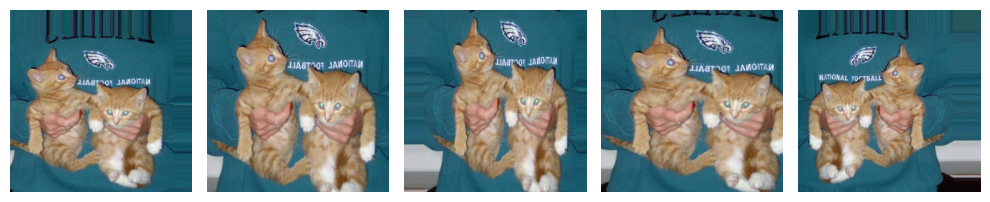

In [18]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [19]:
# 검증 데이터 생성기
image_gen_val = ImageDataGenerator(rescale=1./255)

In [20]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


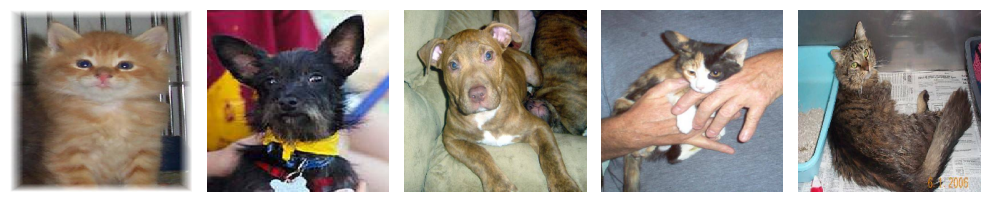

In [21]:
# Validation 데이터 확인
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [22]:
_[:5] # 정답 데이터

array([0., 1., 1., 0., 0.], dtype=float32)

In [23]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.
import tensorflow as tf

# VGG16 모델 구현
def vgg16(input_shape=(256, 256, 3), num_classes=1):
    input_layer = tf.keras.layers.Input(shape=input_shape)

    # Block 1
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)

    # Block 2
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)

    # Block 3
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)

    # Block 4
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)

    # Block 5
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)

    # Fully connected layers
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    out_layer = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)

    model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
    return model

# 모델 생성
model = vgg16()

# 모델 컴파일
loss_function = 'binary_crossentropy'  # 이진 분류의 경우
optimize = tf.keras.optimizers.Adam(learning_rate=0.01)
metric = tf.keras.metrics.BinaryAccuracy()

model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# 모델 요약 출력
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │     134,221,824 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 165,721,921 (632.18 MB)

 Trainable params: 165,721,921 (632.18 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# 손실함수, optimizer, metric 설정
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요.

In [28]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 51s 395ms/step - binary_accuracy: 0.5026 - loss: 0.6940 - val_binary_accuracy: 0.5000 - val_loss: 0.6937
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 0.6937
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 393ms/step - binary_accuracy: 0.4836 - loss: 0.6951 - val_binary_accuracy: 0.5000 - val_loss: 0.6934
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_binary_accuracy: 0.5000 - val_loss: 0.6934
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 76s 394ms/step - binary_accuracy: 0.4843 - loss: 0.6941 - val_binary_accuracy: 0.5000 - val_loss: 0.6947


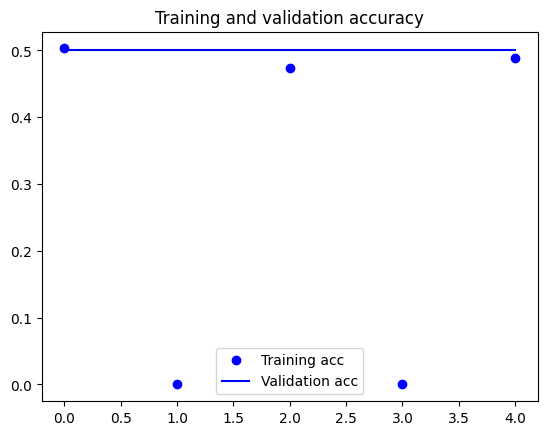

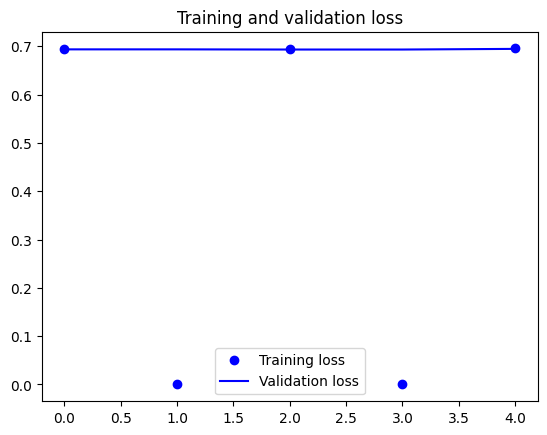

In [29]:
# 시각화 정확도 확인
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
# 문제 1-2. hyperparameter 설정
batch_size = 32  # 배치 크기 조정
epochs = 10  # 에포크 수 증가
IMG_HEIGHT = 256
IMG_WIDTH = 256
learning_rate = 0.0001  # Learning rate 조정

In [31]:
# 문제 1-2. 데이터 generator 생성
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [32]:
# 문제 1-2. 모델 구현
def vgg16(input_shape=(256, 256, 3), num_classes=1):
    input_layer = tf.keras.layers.Input(shape=input_shape)
    # Block 1
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
    # Block 2
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
    # Block 3
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
    # Block 4
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
    # Block 5
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPool2D((2, 2), strides=(2, 2))(x)
    # Fully connected layers
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    x = tf.keras.layers.Dense(4096, activation='relu')(x)
    out_layer = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
    return model

model = vgg16()

In [33]:
# 문제 1-2. loss function, optimizer, metric 설정 및 모델 컴파일
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [35]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 463ms/step - binary_accuracy: 0.5258 - loss: 0.6896 - val_binary_accuracy: 0.4990 - val_loss: 0.6931
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 460ms/step - binary_accuracy: 0.5003 - loss: 0.6934 - val_binary_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/10
 1/62 ━━━━━━━━━━━━━━━━━━━━ 18s 306ms/step - binary_accuracy: 0.5000 - loss: 0.6935

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - binary_accuracy: 0.5000 - loss: 0.6935 - val_binary_accuracy: 0.5000 - val_loss: 0.6929
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 454ms/step - binary_accuracy: 0.5022 - loss: 0.6936 - val_binary_accuracy: 0.5040 - val_loss: 0.6930
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 28s 447ms/step - binary_accuracy: 0.5072 - loss: 0.6932 - val_binary_accuracy: 0.5000 - val_loss: 0.6927
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - binary_accuracy: 0.4375 - loss: 0.6943 - val_binary_accuracy: 0.5000 - val_loss: 0.6928
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 49s 451ms/step - binary_accuracy: 0.4689 - loss: 0.6951 - val_binary_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 438ms/step - binary_accuracy: 0.4630 - loss: 0.6933 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - binary_accuracy: 0.5000 - loss: 0.6932 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 10/10
62/6

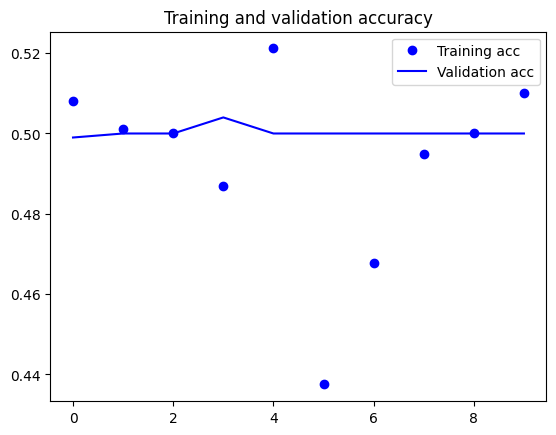

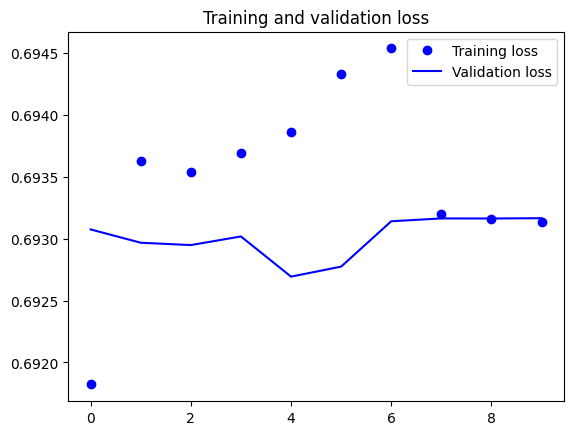

In [36]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()